<a href="https://colab.research.google.com/github/kadavparth/CNN-TF/blob/main/ANN_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
X_train_n = X_train_full/255.
X_test_n = X_test / 255.

In [7]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


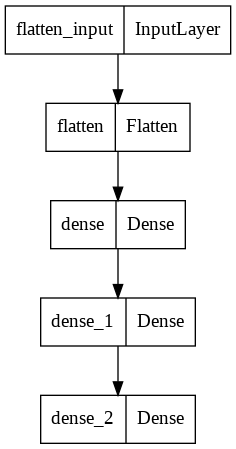

In [10]:
import pydot
keras.utils.plot_model(model)

In [11]:
weights, biases = model.layers[1].get_weights()

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

In [13]:
model_history = model.fit(X_train, y_train,epochs=50, validation_data= (X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy:

In [14]:
model_history.params

{'epochs': 50, 'steps': 1719, 'verbose': 1}

In [15]:
model_history.history


{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8456545472145081,
  0.8563636541366577,
  0.8616363406181335,
  0.8677818179130554,
  0.8715272545814514,
  0.8752181529998779,
  0.8791999816894531,
  0.8822181820869446,
  0.8838000297546387,
  0.8866727352142334,
  0.8893818259239197,
  0.8915091156959534,
  0.8938363790512085,
  0.8969636559486389,
  0.8981454372406006,
  0.9000727534294128,
  0.902472734451294,
  0.9037272930145264,
  0.9059090614318848,
  0.9075272679328918,
  0.9083636403083801,
  0.9100000262260437,
  0.9124181866645813,
  0.9137272834777832,
  0.9154909253120422,
  0.9166363477706909,
  0.9188545346260071,
  0.9198727011680603,
  0.9198727011680603,
  0.9215818047523499,
  0.9228000044822693,
  0.9247454404830933,
  0.9259636402130127,
  0.9267454743385315,
  0.9282181859016418,
  0.93058180809021,
  0.9301636219024658,
  0.9327272772789001,
  0.9328908920288086,
  0.9339091181755066,
  0.9355090856552124,
  0.9365817904472351,
  0.9358545541763306,
  

<function matplotlib.pyplot.show>

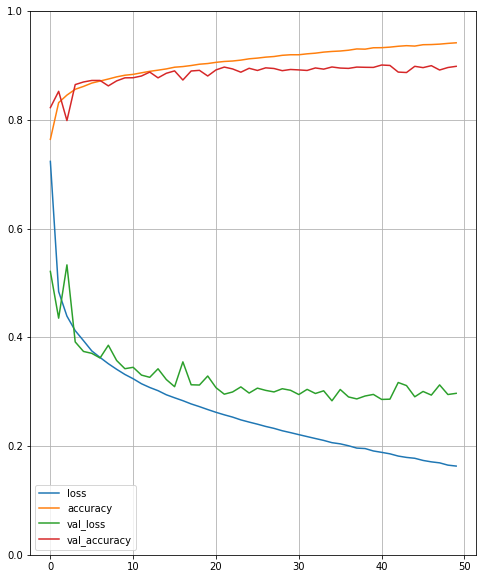

In [16]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8881


[0.33096468448638916, 0.8881000280380249]

In [18]:
X_new = X_test[:3]

In [19]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_pred = model.predict(X_new)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')